<a href="https://colab.research.google.com/github/AndrewSmith44/MAT421/blob/main/Module_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Root Finding Problem Statement

Root-finding methods are used to determine the values of
𝑥
 for which a given function 𝑓(𝑥)
equals zero. These methods are fundamental in numerical analysis and applied mathematics.

For example, consider the function:

$$ f(x) = x^2 - 4 $$  

This function has two roots at 𝑥=2 and 𝑥=−2, meaning that these values satisfy the equation 𝑓(𝑥)=0.

1.1 Visualizing Root Finding

To illustrate this, let's plot
𝑓
(
𝑥
)
and highlight the roots:

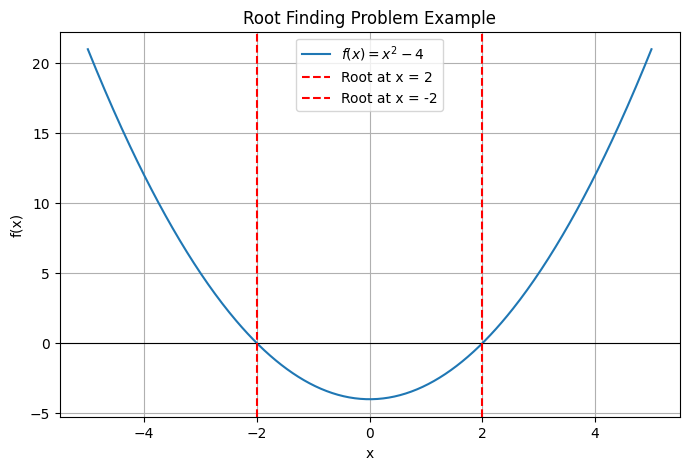

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 4

x = np.linspace(-5, 5, 400)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$f(x) = x^2 - 4$")
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(2, color='red', linestyle='--', label="Root at x = 2")
plt.axvline(-2, color='red', linestyle='--', label="Root at x = -2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Root Finding Problem Example")
plt.legend()
plt.grid()
plt.show()


2. Tolerance

Numerical methods for root finding require a stopping criterion, often based on tolerance. The tolerance defines how close the estimated root must be to the actual root before the algorithm stops.

If xn is the current approximation of the root, then the algorithm stops when:

$$ | f(x_n) | < \text{tolerance} $$  


3. Bisection Method

The Bisection Method is a root-finding technique that repeatedly bisects an interval containing the root until the interval is sufficiently small.

3.1 Bisection Method Algorithm

Given an interval [𝑎,𝑏] where 𝑓(𝑎) and 𝑓(𝑏) have opposite signs, the method follows these steps:

Compute the midpoint:

$$ c = \frac{a + b}{2} $$  

Check if 𝑓(𝑐) is close enough to zero (within tolerance).
If not, determine which subinterval [𝑎,𝑐] or [𝑐,𝑏] contains the root based on the sign of 𝑓(𝑐).
Repeat until the interval is sufficiently small.

3.2 Bisection Method Implementation

In [2]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Function must have opposite signs at endpoints a and b.")

    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, i
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return c, max_iter


root, iterations = bisection_method(lambda x: x**2 - 4, 1, 3)
print(f"Root found: {root}, Iterations: {iterations}")


Root found: 2.0, Iterations: 0


4. Newton-Raphson Method

The Newton-Raphson Method is an iterative root-finding technique that uses the derivative of a function to refine root estimates.

4.1 Newton-Raphson Formula

Starting from an initial guess
𝑥0, the next approximation is given by:

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$  

This process is repeated until convergence.

4.2 Newton-Raphson Implementation

In [4]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x, i
        if dfx == 0:
            raise ValueError("Zero derivative encountered. Choose a different initial guess.")
        x -= fx / dfx

    return x, max_iter


f = lambda x: x**2 - 4
df = lambda x: 2*x
root, iterations = newton_raphson(f, df, x0=3)
print(f"Root found: {root}, Iterations: {iterations}")


Root found: 2.000000000026214, Iterations: 4
